In [1]:
#d = 3
#c = 0.6
#k = 0.25
#b = 0.65

d = 5
c = 0.6
k = 0.25
b = 0.15

pricefactor = 0.45

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

def price(q1, q2):
    return d - q1 - q2


In [2]:
# In a 4 oligopoly
print("  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit")

q_comp4 = d / (4+2*c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp      ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot   ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel    ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)




  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit
Comp       1.0 4.0 1.0 0.275 1.1
Cournot    0.8333333333333334 3.3333333333333335 1.6666666666666663 0.41041666666666676 1.641666666666667
Cartel     0.5555555555555556 2.2222222222222223 2.7777777777777777 0.49722222222222223 1.988888888888889


In [3]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j*4)] = profit(incr/1000, (j/1000)*4)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, (j/1000))

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.999, 0.004] 1.023500625
Min Profit:  [0.999, 3.996] 0.02649862500000008


In [4]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j*4)] = price(i/1000, (j/1000)*4)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.004] Raw:  4.995 Discounted:  2.24775
Min Price:  [0.999, 3.996] Raw:  0.0050000000000003375 Discounted:  0.002250000000000152


[0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.6666666666666667, 0, 1.66666

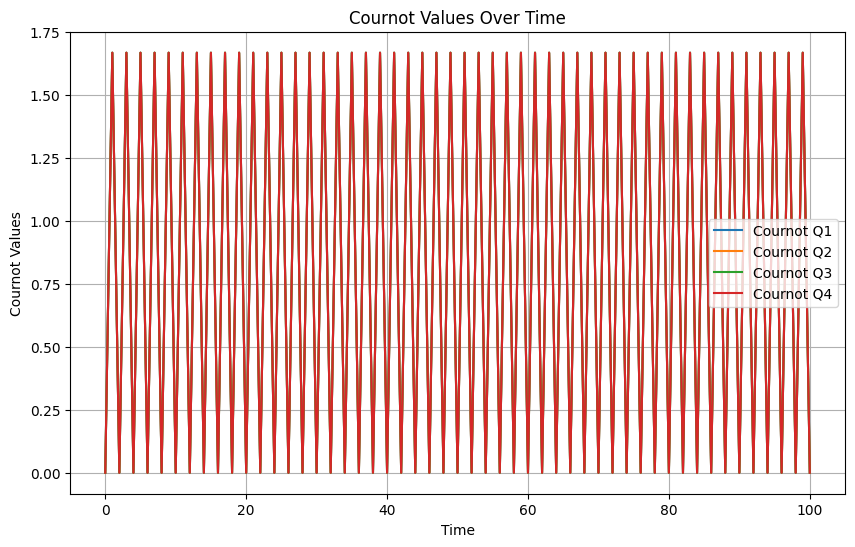

In [5]:
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()